<a href="https://colab.research.google.com/github/SubhashGovindharaj/Mileage-Per-Gallon-Classification/blob/main/Mileage_per_Gallon_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df= pd.read_csv('auto-mpg.csv')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
#mpg - miles per gallon

### Data cleaning

In [ ]:
#missing value - No
#duplicates? - No
#structured - yes

#outliers

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.shape

(398, 9)

In [ ]:
del df['car name']

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [ ]:
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df.horsepower.value_counts()['?'] #we can imputed

6

In [ ]:
df.loc[df.horsepower !='?','horsepower'].astype(int).mean()

df.loc[df.horsepower == '?','horsepower'] = 104

df['horsepower'] = df['horsepower'].astype(int)

In [ ]:
df.dtypes



mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [ ]:
#checking and treating outliers

for column in df.columns[1:]:
  iqr = df[column].quantile(0.75) -  df[column].quantile(0.25)
  upper_threshold =  df[column].quantile(0.75) + (1.5 * iqr)
  lower_threshold =  df[column].quantile(0.25) - (1.5 * iqr)
  df[column] = df[column].clip(lower_threshold,upper_threshold)

## EDA

<Axes: xlabel='cylinders'>

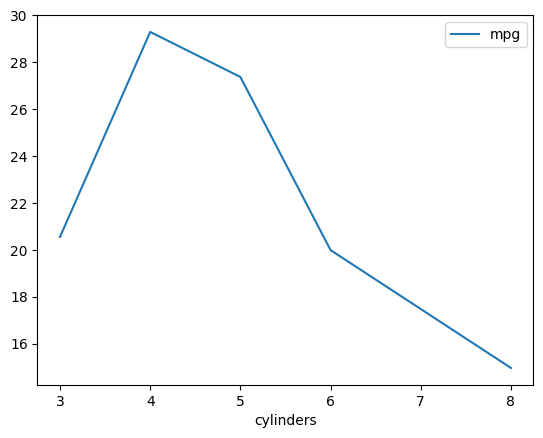

In [ ]:
df.groupby('cylinders')['mpg'].mean().reset_index().plot.line(x = 'cylinders', y= 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

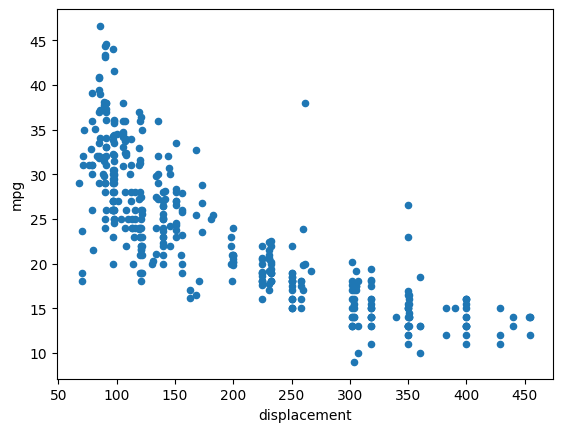

In [ ]:
df.plot.scatter(x = 'displacement', y = 'mpg')

,horsepower,mpg
horsepower,1.0000,-0.7837
mpg,-0.7837,1.0000


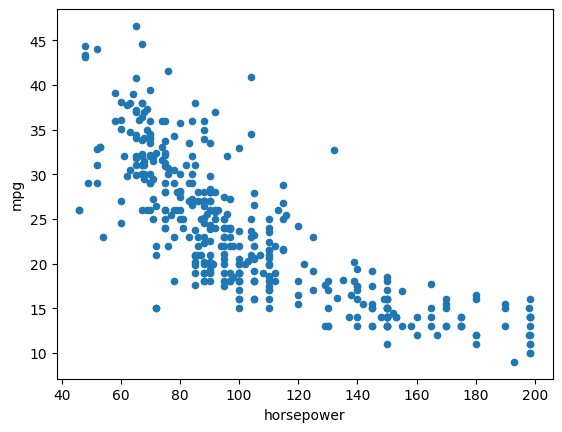

In [ ]:
df.plot.scatter(x = 'horsepower', y = 'mpg')
df[['horsepower', 'mpg']].corr()

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


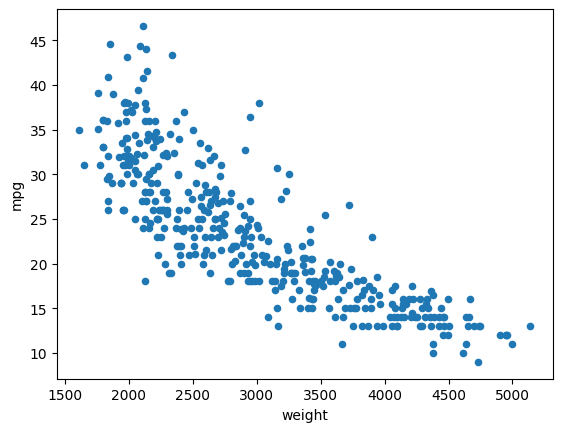

In [ ]:
df.plot.scatter(x = 'weight', y = 'mpg')
df[['weight', 'mpg']].corr()

,acceleration,mpg
acceleration,1.000000,0.418293
mpg,0.418293,1.000000


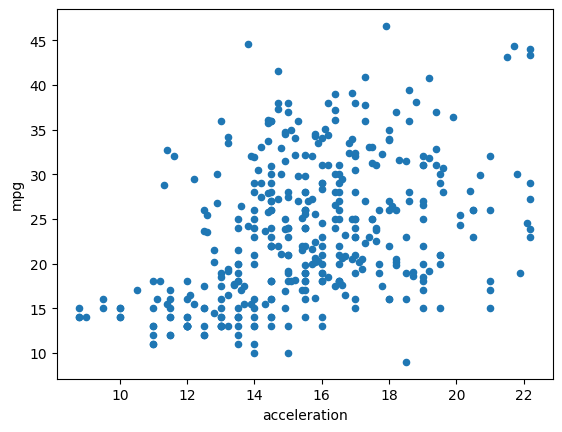

In [ ]:
df.plot.scatter(x = 'acceleration', y = 'mpg')
df[['acceleration', 'mpg']].corr()

<Axes: xlabel='model year', ylabel='mpg'>

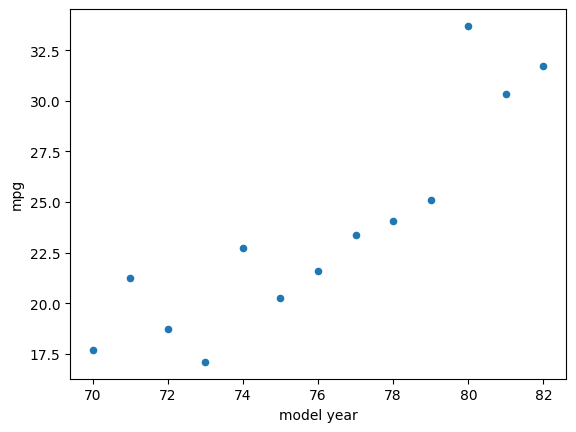

In [ ]:
df.groupby('model year')['mpg'].mean().reset_index().plot.scatter(x = 'model year', y = 'mpg')

<Axes: xlabel='origin', ylabel='mpg'>

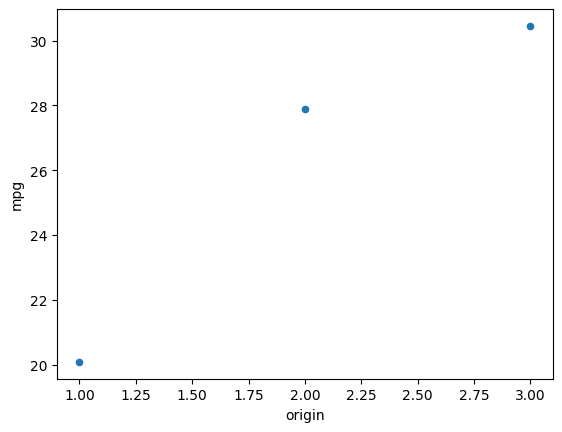

In [ ]:
df.groupby('origin')['mpg'].mean().reset_index().plot.scatter(x = 'origin', y = 'mpg')

## Encoding - No encoding

## split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.loc[:,df.columns[1:]]
y = df.loc[:,'mpg']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=145)

In [ ]:
X_train.shape,X_test.shape

((298, 7), (100, 7))

## Scaling - Not required

## Decision tree regressor model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
model.score(X_test,y_test)

0.6679897546226431

In [ ]:
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10]:
  model = DecisionTreeRegressor(max_depth = depth)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 1, TrainScore: 0.5567591135819174, Cross-ValScore: 0.5336908048182906
Depth - 2, TrainScore: 0.7170629491296046, Cross-ValScore: 0.6212333641746463
Depth - 3, TrainScore: 0.8153765338616772, Cross-ValScore: 0.7605508851563604
Depth - 4, TrainScore: 0.8899975124466792, Cross-ValScore: 0.7852297305280463
Depth - 5, TrainScore: 0.9255392424973765, Cross-ValScore: 0.7837050811194068
Depth - 6, TrainScore: 0.9493994907972296, Cross-ValScore: 0.7843541446939872
Depth - 7, TrainScore: 0.963472988542654, Cross-ValScore: 0.7715490889323038
Depth - 8, TrainScore: 0.9739343990460442, Cross-ValScore: 0.766431092320501
Depth - 9, TrainScore: 0.9828115892110212, Cross-ValScore: 0.7563959247398327
Depth - 10, TrainScore: 0.9891860583882692, Cross-ValScore: 0.7401240812032783


In [ ]:
model = DecisionTreeRegressor(max_depth = 4)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7601989516969417

## Linear regressor model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8131450272098673